In [ ]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pandas.read_csv("https://raw.githubusercontent.com/abbyjameson/BSAD-482.2/main/data/CSVversionofcstadsdata.csv")

<ipython-input-1-9dcb6053afe9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi[col], _ = pandas.factorize(df_kpi[col])
<ipython-input-1-9dcb6053afe9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi[col], _ = pandas.factorize(df_kpi[col])
<ipython-input-1-9dcb6053afe9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

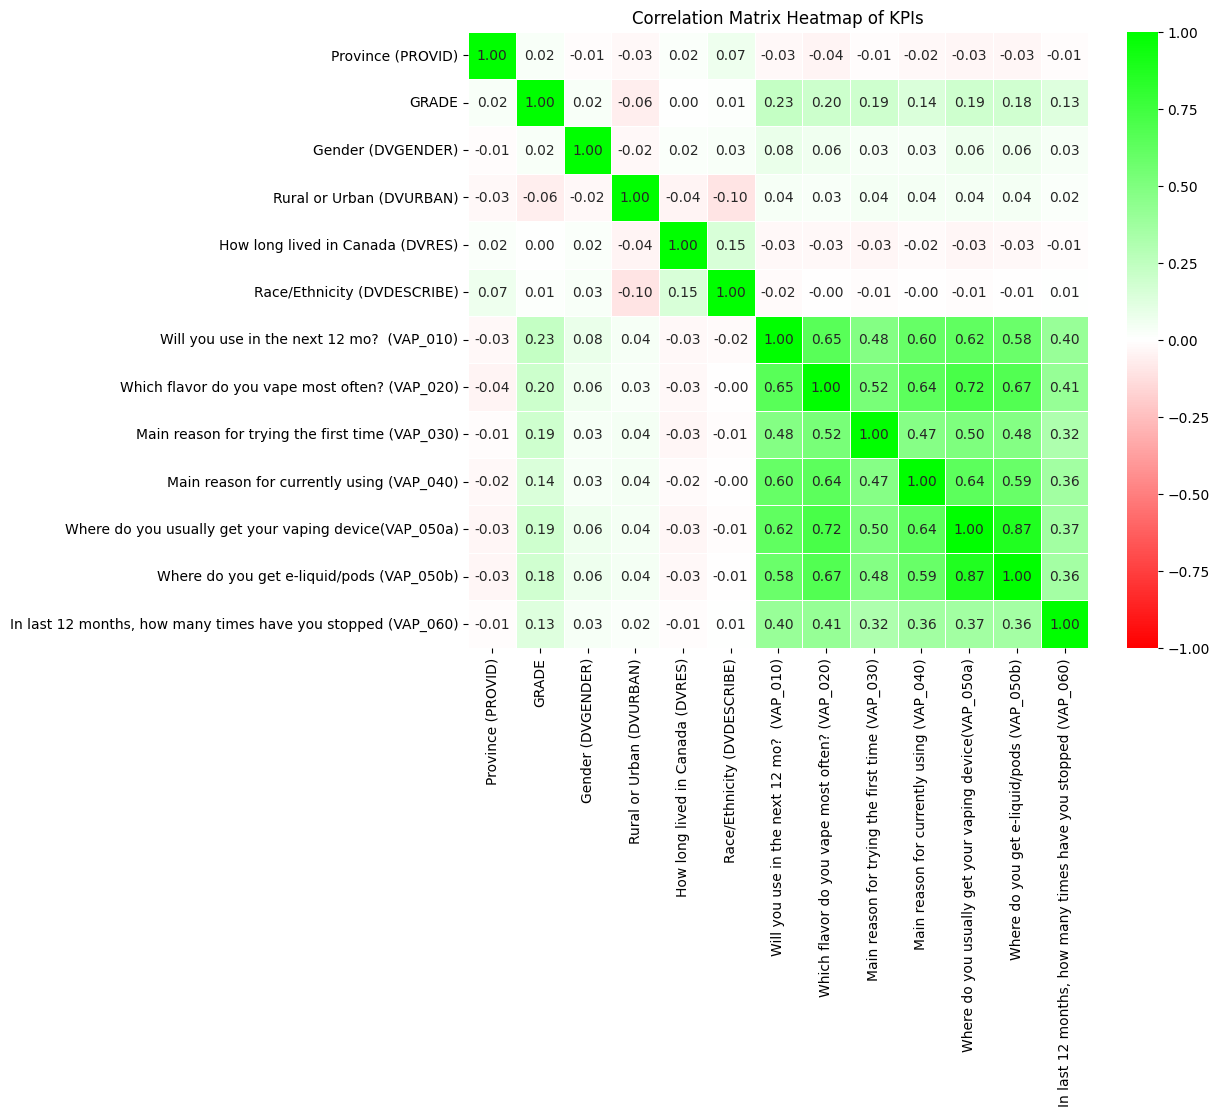

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df = pandas.read_csv("https://raw.githubusercontent.com/abbyjameson/BSAD-482.2/main/data/CSVversionofcstadsdata.csv")

kpi_columns = ["Province (PROVID)", "GRADE", "Gender (DVGENDER)", "Rural or Urban (DVURBAN)", "How long lived in Canada (DVRES)", "Race/Ethnicity (DVDESCRIBE)", "Will you use in the next 12 mo?  (VAP_010)", "Which flavor do you vape most often? (VAP_020)", "Main reason for trying the first time (VAP_030)", "Main reason for currently using (VAP_040)", "Where do you usually get your vaping device(VAP_050a)", "Where do you get e-liquid/pods (VAP_050b)", "In last 12 months, how many times have you stopped (VAP_060)"]
df_kpi = df[kpi_columns]

for col in df_kpi.select_dtypes(include=['object']).columns:
    df_kpi[col], _ = pandas.factorize(df_kpi[col])

my_cmap = mcolors.LinearSegmentedColormap('my_cmap', segmentdata={
    'red': [(0, 1, 1), (0.5, 1, 1), (1, 0, 0)],
    'green': [(0, 0, 0), (0.5, 1, 1), (1, 1, 1)],
    'blue': [(0, 0, 0), (0.5, 1, 1), (1, 0, 0)],
}, N=256)

correlation_matrix = df_kpi.corr(method= "pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=my_cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap of KPIs")
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
ERROR: Could not find a version that satisfies the requirement causallearn (from versions: none)
ERROR: No matching distribution found for causallearn


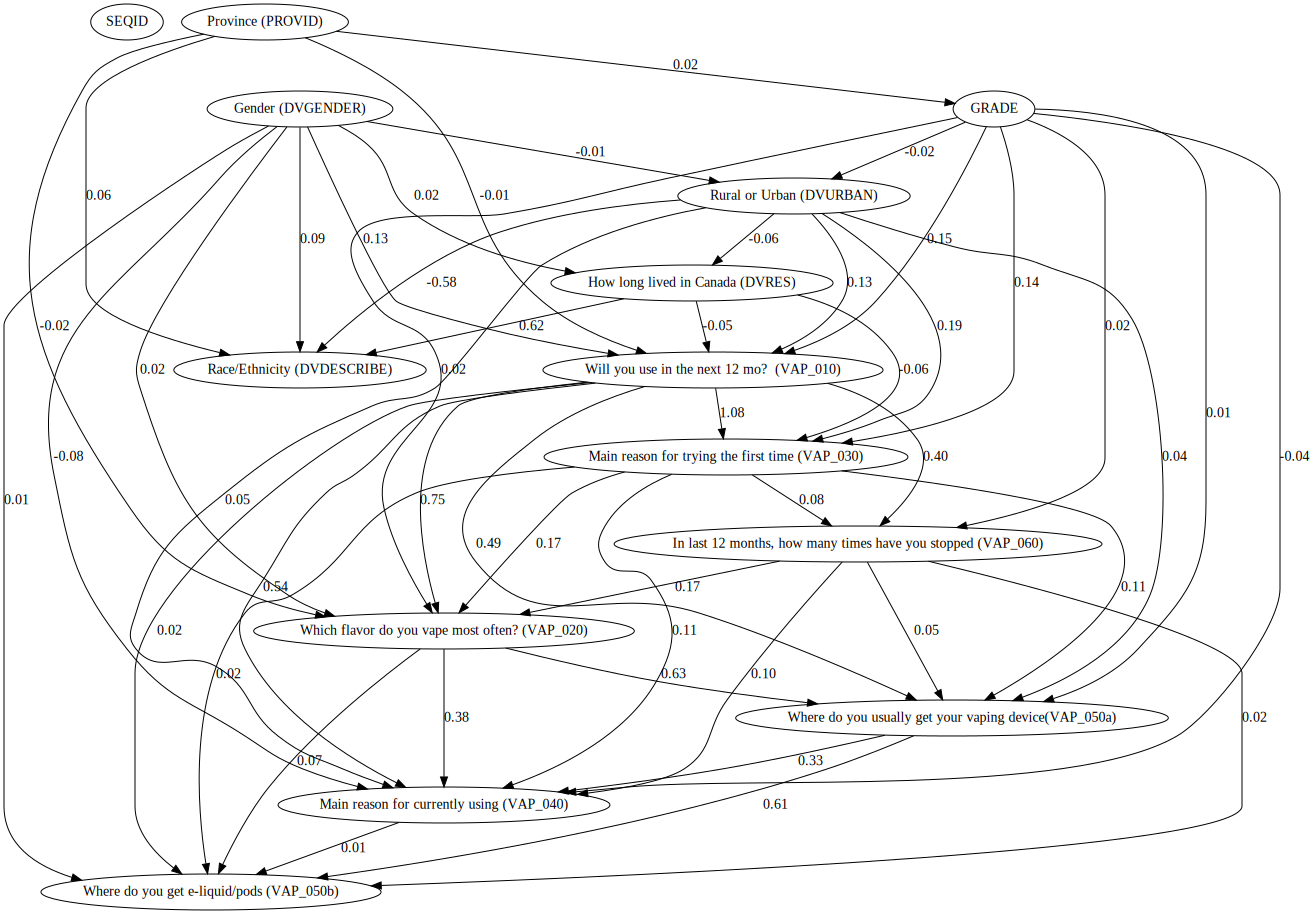

In [1]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install dowhy
!pip install pygraphviz
!pip install causallearn

import pandas as pd
from causallearn.search.ConstraintBased.PC import pc
from dowhy import CausalModel
from causallearn.search.FCMBased import lingam
from causallearn.search.FCMBased.lingam.utils import make_dot

data = pd.read_csv('https://raw.githubusercontent.com/abbyjameson/BSAD-482.2/main/data/CSVversionofcstadsdata.csv')


for col in data.select_dtypes(include=['object']).columns:
    data[col], _ = pd.factorize(data[col])


labels = [f'{col}' for i, col in enumerate(data.columns)]


df = data.to_numpy()


model = lingam.ICALiNGAM()
model.fit(df)


make_dot(model.adjacency_matrix_, labels=labels)
